Trying to simply combine a large number of catalogs with the Laigle+16 catalog (Photometry for more objects), The Davies+15 (V05) catalog (A lot of spectroscopic redshifts), the DIEMOS redshift catalog, and the three morphology catalogs. This should provide a large number of redshifts for a large number of objects. Can go to higher apparent magnitude (avoid problems with incompleteness). I'm hoping this will help with number of galaxies we have? Should be simple, don't want to take too long doing this. 

| Date | Person | Change |
| :- | :- | :--------: |
04/16/2019  |  L. Hunt  |  <ul><li>Initial Version</li><li>Import fits table</li><li>Import other text tables</li></ul>
04/26/2019  |  L. Hunt  |  <ul><li>Need final_z to include photometric redshifts</li><li>(if deimos_use is nan won't match)</li></ul>
05/02/2019  |  L. Hunt  |  Made change to match catalogs to 08 ID number

Import numerical packages

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations

Import Astronomy Packages

In [2]:
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

Import misc./plotting packages

In [3]:
import os
import matplotlib.pyplot as plt

# Setup

In [4]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)

In [5]:
kcordir=os.environ["KCORRECT_DIR"]
catbasedir=os.environ["COSMOS_DIR"]

Reading catalogs into pandas databases

In [6]:
print('Reading Catalogs')

Reading Catalogs


Photometry

In [7]:
laigle_table=Table.read(catbasedir+'/Photometry/COSMOS2015_Laigle_v1.1.fits')
initial_laigle_df=laigle_table.to_pandas()

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
list(initial_laigle_df.columns)

['ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO',
 'H_MAGERR_ISO',
 'H_FLAGS',
 'H_IMAFLAGS_ISO',
 'J_FLUX_APER2',
 'J_FLUXERR_APER2',


In [9]:
laigle_df=initial_laigle_df.loc[(initial_laigle_df.FLAG_HJMCC==0) &
                                (initial_laigle_df.FLAG_COSMOS==1) & 
                                (initial_laigle_df.FLAG_PETER==0)][['NUMBER',
                                                                    'ID2006',
                                                                    'ID2008',
                                                                    'ID2013',
                                                                    'ALPHA_J2000',
                                                                    'DELTA_J2000',
                                                                    'FLUX_RADIUS',
                                                                    'u_MAG_AUTO',
                                                                    'u_MAGERR_AUTO',
                                                                    'B_MAG_AUTO',
                                                                    'B_MAGERR_AUTO',
                                                                    'V_MAG_AUTO',
                                                                    'V_MAGERR_AUTO',
                                                                    'r_MAG_AUTO',
                                                                    'r_MAGERR_AUTO',
                                                                    'ip_MAG_AUTO',
                                                                    'ip_MAGERR_AUTO',
                                                                    'zpp_MAG_AUTO',
                                                                    'zpp_MAGERR_AUTO',
                                                                    'Y_MAG_AUTO',
                                                                    'Y_MAGERR_AUTO',
                                                                    'J_MAG_AUTO',
                                                                    'J_MAGERR_AUTO',
                                                                    'H_MAG_AUTO',
                                                                    'H_MAGERR_AUTO',
                                                                    'Ks_MAG_AUTO',
                                                                    'Ks_MAGERR_AUTO',
                                                                    'ZPDF',
                                                                    'TYPE',
                                                                    'EXTINCTION',
                                                                    'EBV'
]]

In [10]:
laigle_df=laigle_df.rename(columns={'ALPHA_J2000':'RA','DELTA_J2000':'DEC'})

laigle_df=initial_laigle_df[['NUMBER',
 'ID2006',
 'ID2008',
 'ALPHA_J2000',
 'DELTA_J2000',
 'FLUX_RADIUS',
 'u_MAG_AUTO',
 'u_MAGERR_AUTO',
 'B_MAG_AUTO',
 'B_MAGERR_AUTO',
 'V_MAG_AUTO',
 'V_MAGERR_AUTO',
 'r_MAG_AUTO',
 'r_MAGERR_AUTO',
 'ip_MAG_AUTO',
 'ip_MAGERR_AUTO',
 'zpp_MAG_AUTO',
 'zpp_MAGERR_AUTO',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'J_MAG_AUTO',
 'J_MAGERR_AUTO',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'ZPDF',
 'TYPE'
]]

Spectroscopy

In [11]:
typedict={'char':str,'double':np.float64,'float':np.float64,'int':np.int}
with open(catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl') as deimos:
    file=deimos.readlines()
    for line in file:
        deimos_dict=dict(zip(file[71].split(),[typedict[f] for f in file[72].split()]))

In [12]:
davies_table=Table.read(catbasedir+'/Spectroscopy/G10CosmosCatv05/G10COSMOSCatv05.fits')
davies_df=davies_table.to_pandas()
deimos_df=pd.read_csv(
    catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl',     delim_whitespace=True,
    header=71,
    dtype=deimos_dict,
    error_bad_lines=False,
    skiprows=[72,73,74])

b'Skipping line 136: expected 10 fields, saw 11\nSkipping line 142: expected 10 fields, saw 11\nSkipping line 144: expected 10 fields, saw 11\nSkipping line 147: expected 10 fields, saw 11\nSkipping line 150: expected 10 fields, saw 11\nSkipping line 153: expected 10 fields, saw 11\nSkipping line 158: expected 10 fields, saw 11\nSkipping line 160: expected 10 fields, saw 11\nSkipping line 175: expected 10 fields, saw 11\nSkipping line 191: expected 10 fields, saw 11\nSkipping line 196: expected 10 fields, saw 11\nSkipping line 221: expected 10 fields, saw 11\nSkipping line 226: expected 10 fields, saw 11\nSkipping line 232: expected 10 fields, saw 11\nSkipping line 237: expected 10 fields, saw 11\nSkipping line 242: expected 10 fields, saw 11\nSkipping line 253: expected 10 fields, saw 11\nSkipping line 271: expected 10 fields, saw 11\nSkipping line 290: expected 10 fields, saw 11\nSkipping line 309: expected 10 fields, saw 11\nSkipping line 321: expected 10 fields, saw 11\nSkipping li

Adding objects that were skipped because some columns had two values
(Note, had to go through and manually edit text file because some parts of the notes column had spaces as well. These were found by printing x_series.Q It should be a number so if it has a molecular line identifier in it the notes section has a space. Quickest to just edit these.)

In [13]:
with open(catbasedir+'/Spectroscopy/deimos_10k_March2018/deimos_redshifts.tbl') as deimos:
    file=deimos.readlines()
    i=0
    for line in file:
        if (len(line.split())==11) & (i>74):
            x=line.split()
            del x[3]
            x_series=pd.Series(x,index=file[71].split())
            deimos_df=deimos_df.append(x_series,ignore_index=True)
        i=i+1

deimos_df.columns='deimos_'+deimos_df.columns.str.lower()

Match Catalogs based on source name

In [14]:
deimos_df['catalog']=np.nan

deimos_df.loc[deimos_df.deimos_id.str.startswith('L',na=False),'catalog']='L'

deimos_df.loc[deimos_df.deimos_id.str.startswith('C',na=False),'catalog']='C'

In [15]:
deimos_df.loc[deimos_df.catalog!=deimos_df.catalog,'deimos_id']=0

In [16]:
deimos_df.loc[deimos_df.catalog=='L','deimos_id']=deimos_df.loc[
    deimos_df.catalog=='L','deimos_id'].str.strip('L').astype(int)

deimos_df.loc[deimos_df.deimos_id.str.startswith('C',na=False),'deimos_id']=deimos_df.loc[
    deimos_df.deimos_id.str.startswith('C',na=False),'deimos_id'].str.strip('C').astype(int)

deimos_df.loc[deimos_df.catalog!=deimos_df.catalog,'deimos_id']=0

deimos_df['deimos_id']=deimos_df['deimos_id'].astype(int)

In [17]:
join_laigle_deimos_l=pd.merge(left=laigle_df,
                            right=deimos_df.loc[deimos_df.catalog=='L',['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'deimos_q',
                                             'catalog']],
                            how='left',
                            left_on=['NUMBER'],
                            right_on=['deimos_id'])

join_laigle_deimos=pd.merge(left=join_laigle_deimos_l,
                            right=deimos_df.loc[deimos_df.catalog=='C',['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'deimos_q',
                                             'catalog']],
                            how='left',
                            left_on=['ID2006'],
                            right_on=['deimos_id'])

In [18]:
for column in ['deimos_id','deimos_ra','deimos_dec','deimos_zspec','deimos_qf','deimos_q','catalog']:
    join_laigle_deimos[column]=np.nan
    join_laigle_deimos[column].fillna(join_laigle_deimos[column+'_x'],inplace=True)
    join_laigle_deimos[column].fillna(join_laigle_deimos[column+'_y'],inplace=True)
    join_laigle_deimos=join_laigle_deimos.drop(columns=[column+'_y',column+'_x'])

In [19]:
davies_coord=SkyCoord(ra=davies_df['RA_06'].values*u.degree,
                     dec=davies_df['DEC_06'].values*u.degree)
deimos_coord=SkyCoord(ra=deimos_df.loc[deimos_df.deimos_id==0,'deimos_ra'].values*u.degree,
                     dec=deimos_df.loc[deimos_df.deimos_id==0,'deimos_dec'].values*u.degree)
laigle_coord=SkyCoord(ra=laigle_df['RA'].values*u.degree,
                     dec=laigle_df['DEC'].values*u.degree)

In [20]:
idx_deimos,d2d,d3d=deimos_coord.match_to_catalog_sky(laigle_coord)

In [21]:
for idx in range(0,len(idx_deimos)):
    if d2d[idx].arcsecond<1:
        join_laigle_deimos.iloc[idx_deimos[idx]][['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'deimos_q']]=deimos_df.loc[deimos_df.deimos_id==0].iloc[idx][['deimos_id',
                                             'deimos_ra',
                                             'deimos_dec',
                                             'deimos_zspec',
                                             'deimos_qf',
                                             'deimos_q']]

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:837: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)


In [22]:
final_catalog=pd.merge(join_laigle_deimos,davies_df[['ID_06','Z_USE','Z_BEST','Z_GEN']],how='left',left_on=['ID2006'],right_on=['ID_06'])

In [23]:
final_catalog=pd.merge(join_laigle_deimos,davies_df[['ID_08','Z_USE','Z_BEST','Z_GEN']],how='left',left_on=['ID2008'],right_on=['ID_08'])

In [24]:
len(final_catalog)

536080

In [25]:
apparent_magnitude=final_catalog.loc[final_catalog.B_MAG_AUTO<80,'B_MAG_AUTO']-final_catalog.loc[final_catalog.B_MAG_AUTO<80,'EBV']*final_catalog.loc[final_catalog.B_MAG_AUTO<80,'EXTINCTION']

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.76079588e-05,   3.52159176e-05,
          1.76079588e-04,   2.37707444e-04,   7.57142228e-04,
          1.28538099e-03,   2.24501475e-03,   4.61328520e-03,
          7.81793371e-03,   1.33996566e-02,   2.38323722e-02,
          4.22326892e-02,   7.45344896e-02,   1.32799225e-01,
          2.23612273e-01,   3.51710173e-01,   4.50341154e-01,
          3.46304530e-01,   1.83545363e-01,   7.60223621e-02,
          3.49429942e-02,   1.58647709e-02,   7.26328300e-03,
          3.48637584e-03,   1.94567945e-03,   9.77241713e-04]),
 array([ 15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,
         19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,
         24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,
         28.5,  29. ,  29.5,  30. ]),
 <a list of 30 Patch objects>)

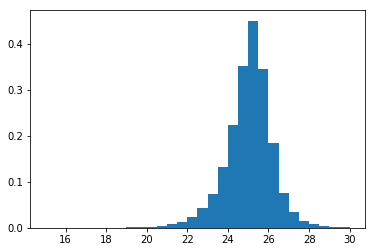

In [30]:
plt.hist(final_catalog.loc[final_catalog.ip_MAG_AUTO<25,'B_MAG_AUTO'],bins=30,range=(15,30),density=True)

In [65]:
final_catalog['deimos_q']=final_catalog.deimos_q.apply(float)

In [66]:
final_catalog.columns

Index(['NUMBER', 'ID2006', 'ID2008', 'ID2013', 'RA', 'DEC', 'FLUX_RADIUS',
       'u_MAG_AUTO', 'u_MAGERR_AUTO', 'B_MAG_AUTO', 'B_MAGERR_AUTO',
       'V_MAG_AUTO', 'V_MAGERR_AUTO', 'r_MAG_AUTO', 'r_MAGERR_AUTO',
       'ip_MAG_AUTO', 'ip_MAGERR_AUTO', 'zpp_MAG_AUTO', 'zpp_MAGERR_AUTO',
       'Y_MAG_AUTO', 'Y_MAGERR_AUTO', 'J_MAG_AUTO', 'J_MAGERR_AUTO',
       'H_MAG_AUTO', 'H_MAGERR_AUTO', 'Ks_MAG_AUTO', 'Ks_MAGERR_AUTO', 'ZPDF',
       'TYPE', 'deimos_id', 'deimos_ra', 'deimos_dec', 'deimos_zspec',
       'deimos_qf', 'deimos_q', 'catalog', 'ID_06', 'Z_USE', 'Z_BEST',
       'Z_GEN'],
      dtype='object')

In [67]:
final_catalog.loc[(final_catalog.deimos_q.isnull()),
                  'final_z']=final_catalog.loc[(final_catalog.deimos_q.isnull()),
                                               'ZPDF']

final_catalog.loc[(final_catalog.deimos_q.isnull()),
                  'final_use']=2


final_catalog.loc[(final_catalog.Z_USE<3),'final_z']=final_catalog.loc[(final_catalog.Z_USE<3),'Z_BEST']

final_catalog.loc[(final_catalog.Z_USE<3),'final_use']=1

final_catalog.loc[(final_catalog.Z_USE>=3)&
                  (final_catalog.deimos_q==2),
                  'final_z']=final_catalog.loc[(final_catalog.Z_USE>=3)&
                                               (final_catalog.deimos_q==2),
                                                'deimos_zspec']

final_catalog.loc[(final_catalog.Z_USE>=3)&
                  (final_catalog.deimos_q==2),
                  'final_use']=1

final_catalog.loc[(final_catalog.Z_USE>=3)&
                  (final_catalog.deimos_q<2),
                  'final_z']=final_catalog.loc[(final_catalog.Z_USE>=3)&
                                               (final_catalog.deimos_q<2),
                                               'ZPDF']

final_catalog.loc[(final_catalog.Z_USE>=3)&
                  (final_catalog.deimos_q<2),
                  'final_use']=2

In [68]:
final_catalog.loc[(final_catalog.Z_USE.isnull())&
                  (final_catalog.deimos_q<2),
                  'final_z']=final_catalog.loc[(final_catalog.Z_USE.isnull())&
                                               (final_catalog.deimos_q<2),
                                               'ZPDF']
final_catalog.loc[(final_catalog.Z_USE.isnull())&
                  (final_catalog.deimos_q<2),
                  'final_use']=2

final_catalog.loc[(final_catalog.Z_USE.isnull())&
                  (final_catalog.deimos_q==2.0),
                  'final_z']=final_catalog.loc[(final_catalog.Z_USE.isnull())&
                                               (final_catalog.deimos_q==2.0),
                                               'deimos_zspec']
final_catalog.loc[(final_catalog.Z_USE.isnull())&
                  (final_catalog.deimos_q==2),
                  'final_use']=1

final_catalog.loc[(final_catalog.deimos_q==2)&
                  (final_catalog.deimos_zspec.isnull())&
                  (final_catalog.Z_USE>2),
                 'final_use']=2

final_catalog.loc[(final_catalog.deimos_q==2)&
                  (final_catalog.deimos_zspec.isnull())&
                  (final_catalog.Z_USE>2),
                 'final_z']=final_catalog.loc[(final_catalog.deimos_q==2)&
                  (final_catalog.deimos_zspec.isnull())&
                  (final_catalog.Z_USE>2),
                 'ZPDF']

In [69]:
print(final_catalog.final_z)

0           0.0386
1           0.3695
2             0.16
3           2.3343
4           1.3916
5           1.7792
6           2.1991
7           2.4407
8           0.2079
9            1.206
10          0.5927
11           1.956
12          1.1044
13          2.7634
14          0.8803
15          1.9539
16          2.9145
17          2.4809
18          2.2077
19          1.6363
20          0.2976
21          3.2677
22          3.7704
23          0.3065
24          1.5886
25          0.8685
26          4.9516
27          2.0417
28          1.2809
29          1.2742
            ...   
536050      0.3756
536051      0.3799
536052      0.8096
536053       0.815
536054      0.5638
536055    0.247446
536056      1.1229
536057      1.2236
536058      1.2077
536059      0.5662
536060      1.3156
536061       1.148
536062    0.926736
536063      0.6978
536064        0.43
536065      0.6812
536066      0.4982
536067    0.344023
536068     0.70521
536069      0.1978
536070      0.3673
536071    0.

In [70]:
print(len(final_catalog.loc[final_catalog.final_use==1]))
print(len(final_catalog.loc[final_catalog.Z_USE<3]))
print(len(final_catalog.loc[final_catalog.Z_USE<4]))

26876
23779
32265


29204


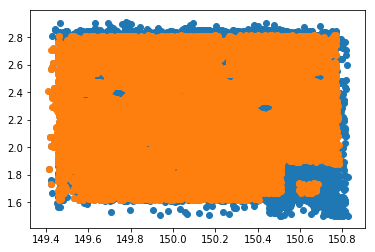

<Figure size 432x288 with 0 Axes>

In [71]:
plt.scatter(davies_df.loc[davies_df.Z_USE<4]['RA_06'],davies_df.loc[davies_df.Z_USE<4]['DEC_06'])
plt.scatter(final_catalog.loc[final_catalog.final_use==1,'RA'],
            final_catalog.loc[final_catalog.final_use==1,'DEC'])
plt.figure()
#plt.hist(laigle_davies_06.loc[laigle_davies_06.Z_USE<4]['zpp_MAG_AUTO'],bins=30,range=[15,30])
#plt.hist(laigle_davies_06['zpp_MAG_AUTO'],bins=30,range=[15,30],alpha=0.3)

#print(len(laigle_davies_06.loc[laigle_davies_06.Z_USE<3]))
print(len(davies_df.loc[davies_df.Z_USE<3]))


In [30]:
final_catalog.to_csv(catbasedir+'/Final_Catalogs/final_spec_catalog_08.csv',index=False)